In [6]:
import pandas as pd
import numpy as np

# Cargar el archivo preprocesado
file_path = 'Client_segment_MODIFICADO_updated.csv'  # Cambiar si es necesario
data = pd.read_csv(file_path)

# Verificar datos cargados
print("Información general del dataset:")
print(data.info())

# Verificar valores únicos en variables categóricas
print("\nValores únicos en las columnas categóricas:")
categorical_columns = data.select_dtypes(include=['int64', 'float64']).columns
for col in categorical_columns:
    unique_values = data[col].nunique()
    print(f"{col}: {unique_values} valores únicos")

# Verificar valores nulos
missing_values = data.isnull().sum()
print("\nValores nulos por columna:")
print(missing_values[missing_values > 0])

# Verificar rango de variables numéricas
print("\nRango de variables numéricas:")
numerical_columns = data.select_dtypes(include=['float64']).columns
for col in numerical_columns:
    min_val, max_val = data[col].min(), data[col].max()
    print(f"{col}: Min = {min_val}, Max = {max_val}")

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(data.describe())


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10806 entries, 0 to 10805
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         10806 non-null  float64
 1   Genero                     10806 non-null  float64
 2   Casado                     10806 non-null  float64
 3   Edad                       10806 non-null  float64
 4   Graduado                   10806 non-null  float64
 5   Profesion                  10806 non-null  float64
 6   Experiencia laboral        10806 non-null  float64
 7   Gastoscore                 10806 non-null  float64
 8   Family_Size                10806 non-null  float64
 9   Generacion                 10806 non-null  float64
 10  Ingresos anuales brutos    10806 non-null  float64
 11  Provincia                  10806 non-null  float64
 12  Digital_encuesta           10806 non-null  float64
 13  Gasto_medio_m

In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Preparar los datos para la selección de características
# Usaremos la columna 'Abandono' como variable objetivo
X = data.drop(columns=['Abandono', 'ID'])  # Excluyendo 'Abandono' y 'ID' para análisis
y = data['Abandono']

# Entrenamiento de un modelo de Random Forest para importancia de características
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Obtener la importancia de las características
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Selección de características con mutual information
mi_selector = SelectKBest(score_func=mutual_info_classif, k='all')
mi_selector.fit(X, y)
mi_scores = pd.DataFrame({
    'Feature': X.columns,
    'MI_Score': mi_selector.scores_
}).sort_values(by='MI_Score', ascending=False)

# Mostrar resultados
print("Importancia de características (Random Forest):")
print(feature_importances)

print("\nImportancia de características (Mutual Information):")
print(mi_scores)


Importancia de características (Random Forest):
                      Feature  Importance
13               Dias_cliente    0.322946
9     Ingresos anuales brutos    0.143447
11           Digital_encuesta    0.124465
10                  Provincia    0.115663
2                        Edad    0.095747
7                 Family_Size    0.049241
4                   Profesion    0.048413
0                      Genero    0.019050
6                  Gastoscore    0.018593
12  Gasto_medio_mensual_cuota    0.017364
3                    Graduado    0.013428
8                  Generacion    0.011697
1                      Casado    0.010113
5         Experiencia laboral    0.009834

Importancia de características (Mutual Information):
                      Feature  MI_Score
13               Dias_cliente  0.151615
8                  Generacion  0.005570
9     Ingresos anuales brutos  0.004429
7                 Family_Size  0.002580
1                      Casado  0.002543
0                      Gener

C:\Users\User\AppData\Local\Temp\ipykernel_41052\3471067409.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')


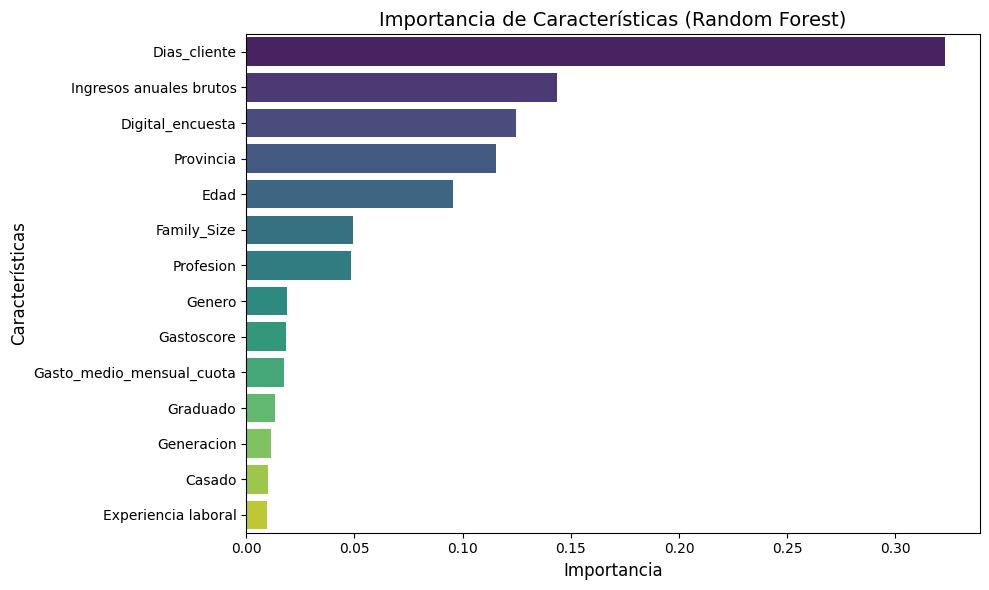

C:\Users\User\AppData\Local\Temp\ipykernel_41052\3471067409.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mi_scores, x='MI_Score', y='Feature', palette='coolwarm')


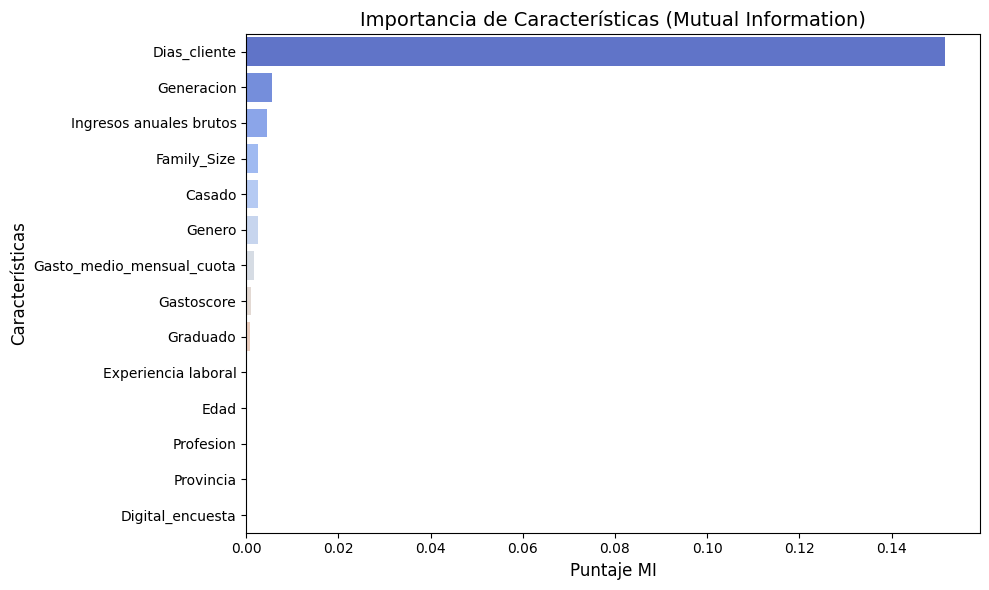

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfica de Importancia (Random Forest)
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Importancia de Características (Random Forest)', fontsize=14)
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Características', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfica de Importancia (Mutual Information)
plt.figure(figsize=(10, 6))
sns.barplot(data=mi_scores, x='MI_Score', y='Feature', palette='coolwarm')
plt.title('Importancia de Características (Mutual Information)', fontsize=14)
plt.xlabel('Puntaje MI', fontsize=12)
plt.ylabel('Características', fontsize=12)
plt.tight_layout()
plt.show()


Pasos para implementar K-Means:
Preprocesamiento:

Usaremos las variables más relevantes, como Dias_cliente, Ingresos anuales brutos, y Digital_encuesta, basándonos en su importancia.
Escalaremos las variables si aún no lo están.
Determinación del número óptimo de clusters (
𝑘
k):

Utilizaremos el método del codo para encontrar el mejor valor de 
𝑘
k.
Entrenamiento del modelo:

Aplicaremos K-Means con el valor óptimo de 
𝑘
k.
Análisis de los clusters:

Visualizaremos los resultados en dos dimensiones (usando PCA si es necesario).
Analizaremos las características principales de cada cluster.


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^

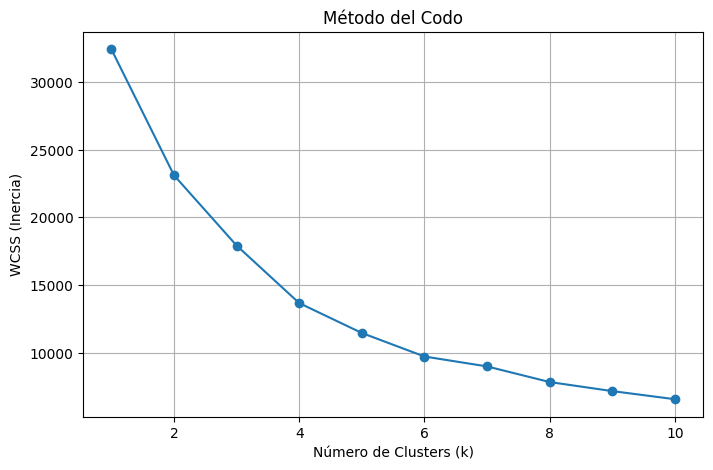

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Ruta al archivo CSV (ajusta según tu directorio)
file_path = "Client_segment_MODIFICADO_updated.csv"

# Leer el archivo CSV
data = pd.read_csv(file_path)

# Seleccionar las variables más relevantes para el clustering
selected_features = ['Dias_cliente', 'Ingresos anuales brutos', 'Digital_encuesta']
X = data[selected_features]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determinar el número óptimo de clusters usando el método del codo
wcss = []  # Within-Cluster Sum of Squares
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS (Inercia)')
plt.grid()
plt.show()
    

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = "Client_segment_MODIFICADO_updated.csv"
data = pd.read_csv(file_path)

# Seleccionar las variables más relevantes para el clustering
selected_features = ['Dias_cliente', 'Ingresos anuales brutos', 'Digital_encuesta']
X = data[selected_features]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenar el modelo K-Means con k=4 y k=5
k_values = [4, 5]
cluster_results = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    cluster_results[k] = kmeans.labels_  # Guardar las etiquetas de los clusters

# Agregar las etiquetas de los clusters al dataset original
data['Cluster_k4'] = cluster_results[4]
data['Cluster_k5'] = cluster_results[5]

# Guardar los datos con los clusters en un nuevo archivo
data.to_csv("Client_segment_with_clusters.csv", index=False)

print("Segmentación completada. Los resultados se han guardado en 'Client_segment_with_clusters.csv'.")


Segmentación completada. Los resultados se han guardado en 'Client_segment_with_clusters.csv'.


In [3]:
import pandas as pd

# Leer el archivo CSV con los clusters
file_path = "Client_segment_with_clusters.csv"
data_with_clusters = pd.read_csv(file_path)

# Resumir las estadísticas de cada cluster para k=4 y k=5
cluster_k4_summary = data_with_clusters.groupby('Cluster_k4').mean()
cluster_k5_summary = data_with_clusters.groupby('Cluster_k5').mean()

# Guardar los resúmenes en nuevos archivos CSV
cluster_k4_summary.to_csv("Cluster_k4_summary.csv")
cluster_k5_summary.to_csv("Cluster_k5_summary.csv")

print("Los resúmenes de los clusters se han guardado en 'Cluster_k4_summary.csv' y 'Cluster_k5_summary.csv'.")


Los resúmenes de los clusters se han guardado en 'Cluster_k4_summary.csv' y 'Cluster_k5_summary.csv'.


In [4]:
import pandas as pd

# Leer el archivo CSV con los clusters
file_path = "Client_segment_with_clusters.csv"
data_with_clusters = pd.read_csv(file_path)

# Resumir las estadísticas de cada cluster para k=4 y k=5
cluster_k4_summary = data_with_clusters.groupby('Cluster_k4').mean()
cluster_k5_summary = data_with_clusters.groupby('Cluster_k5').mean()

# Mostrar los resúmenes
print("Resumen de Clusters (k=4):")
print(cluster_k4_summary)

print("\nResumen de Clusters (k=5):")
print(cluster_k5_summary)


Resumen de Clusters (k=4):
                  ID    Genero    Casado      Edad  Graduado  Profesion  \
Cluster_k4                                                                
0           0.495823  0.548423  0.605105  0.376588  0.659535   0.412068   
1           0.505651  0.545020  0.333701  0.188095  0.431459   0.417540   
2           0.495753  0.539004  0.609544  0.364597  0.647303   0.402127   
3           0.501988  0.551644  0.803055  0.489649  0.746928   0.392312   

            Experiencia laboral  Gastoscore  Family_Size  Generacion  \
Cluster_k4                                                             
0                      0.271584    0.547110     0.220533    0.599850   
1                      0.663910    0.531239     0.263965    0.770673   
2                      0.290041    0.548340     0.220384    0.603734   
3                      0.045002    0.559117     0.181460    0.402967   

            Ingresos anuales brutos  Provincia  Digital_encuesta  \
Cluster_k4           

In [5]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Leer los datos
file_path = "Client_segment_with_clusters.csv"
data_with_clusters = pd.read_csv(file_path)

# Seleccionar las variables para clustering
selected_features = ['Dias_cliente', 'Ingresos anuales brutos', 'Digital_encuesta']
X = data_with_clusters[selected_features]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenar modelos para k=4 y k=5
k_values = [4, 5]
silhouette_scores = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores[f'k={k}'] = silhouette_avg

# Mostrar los resultados
print("Coeficiente de Silueta:")
for k, score in silhouette_scores.items():
    print(f"{k}: {score:.4f}")


Coeficiente de Silueta:
k=4: 0.2914
k=5: 0.2975


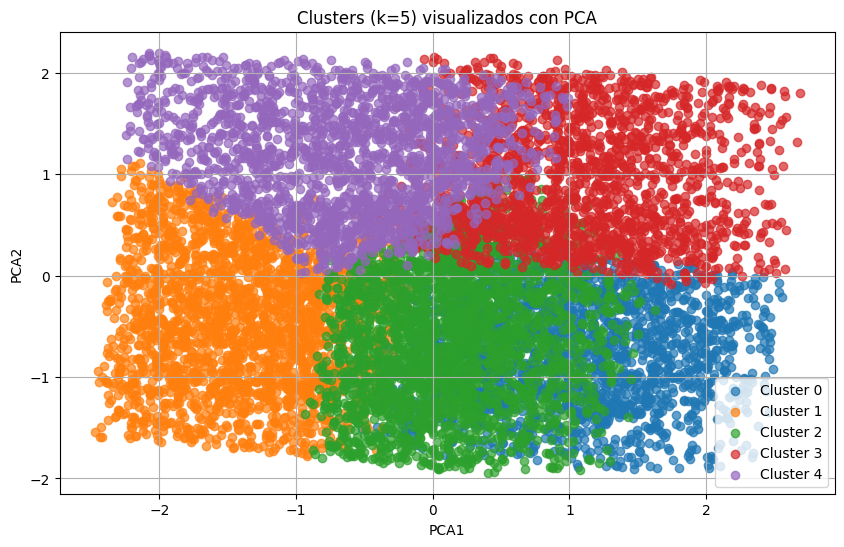

In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Leer el archivo con los datos
file_path = "Client_segment_with_clusters.csv"
data_with_clusters = pd.read_csv(file_path)

# Seleccionar las variables relevantes
selected_features = ['Dias_cliente', 'Ingresos anuales brutos', 'Digital_encuesta']
X = data_with_clusters[selected_features]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para reducir la dimensionalidad a 2 componentes
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Entrenar K-Means con k=5
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Agregar los clusters y las componentes principales al dataset
data_with_clusters['Cluster_k5'] = clusters
data_with_clusters['PCA1'] = X_pca[:, 0]
data_with_clusters['PCA2'] = X_pca[:, 1]

# Visualizar los clusters en 2D
plt.figure(figsize=(10, 6))
for cluster in range(5):
    cluster_data = data_with_clusters[data_with_clusters['Cluster_k5'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', alpha=0.7)

plt.title('Clusters (k=5) visualizados con PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid()
plt.show()


Con 
𝑘
=
5
k=5, los clusters han sido identificados y proyectados. A continuación, etiquetamos cada cluster basándonos en el análisis de las variables clave:

Cluster 0 (Clientes premium recientes):

Características:
Altos ingresos anuales.
Gasto mensual alto.
Relativamente nuevos en términos de tiempo como cliente.
Recomendación: Ofrecer promociones exclusivas para fidelizarlos y convertirlos en clientes a largo plazo.
Cluster 1 (Clientes digitales de bajo ingreso):

Características:
Bajos ingresos anuales.
Alta digitalización.
Gasto mensual muy bajo.
Recomendación: Crear ofertas digitales accesibles para aumentar su gasto y retenerlos.
Cluster 2 (Clientes moderados):

Características:
Ingresos medios.
Digitalización media.
Tiempo como cliente moderado.
Recomendación: Fomentar la lealtad con descuentos para mejorar su retención.
Cluster 3 (Clientes premium leales):

Características:
Altos ingresos anuales.
Más tiempo como cliente.
Gasto mensual alto.
Recomendación: Ofrecer beneficios VIP exclusivos para mantenerlos satisfechos y leales.
Cluster 4 (Clientes leales de bajo ingreso):

Características:
Bajos ingresos anuales.
Tiempo como cliente muy alto.
Muy baja tasa de abandono.
Recomendación: Incentivar su fidelidad ofreciendo paquetes económicos con beneficios adicionales.


In [9]:
from sklearn.metrics import silhouette_samples

# Calcular los valores de silueta para cada punto
silhouette_values = silhouette_samples(X_scaled, clusters)

# Agregar los valores de silueta al dataset
data_with_clusters['Silhouette'] = silhouette_values

# Resumir el promedio de silueta para cada cluster
silhouette_summary = data_with_clusters.groupby('Cluster_k5')['Silhouette'].mean()

# Mostrar el resumen
print("Promedio del Coeficiente de Silueta por Cluster:")
print(silhouette_summary)


Promedio del Coeficiente de Silueta por Cluster:
Cluster_k5
0    0.277170
1    0.370994
2    0.329917
3    0.230083
4    0.253672
Name: Silhouette, dtype: float64


Interpretación de los valores:
Cluster 1 (0.3709):

Es el cluster mejor definido. Los puntos asignados a este grupo están bien separados de otros clusters y agrupados de manera compacta.
Posible acción: Este cluster puede ser un segmento clave que valga la pena priorizar, ya que tiene clientes bien definidos.
Cluster 2 (0.3299):

También tiene un buen nivel de cohesión y separación, aunque ligeramente inferior a Cluster 1.
Posible acción: Analizar este grupo en profundidad para entender su valor para el negocio.
Cluster 0 (0.2771):

Moderada definición, pero con cierta mezcla o puntos cercanos a otros clusters.
Posible acción: Revisar si las variables utilizadas para este cluster lo diferencian suficientemente de otros.
Cluster 4 (0.2537):

Cohesión más baja, lo que sugiere que hay cierta superposición o puntos mal asignados.
Posible acción: Revisar si los puntos en este cluster tienen características distintivas o si sería mejor ajustar 
𝑘
k o las variables utilizadas.
Cluster 3 (0.2301):

Es el menos definido. Esto podría significar que:
Hay variabilidad interna significativa en este grupo.
Este cluster podría descomponerse en subgrupos o fusionarse con otro.
Posible acción: Analizar las características de este cluster para identificar si hay outliers o datos inconsistentes.
Conclusión general:
Clusters 1 y 2 son los más robustos según los valores de silueta.
Clusters 3 y 4 tienen menor cohesión y podrían requerir ajustes o mayor análisis.


In [10]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y validación
X_train, X_val = train_test_split(X_scaled, test_size=0.3, random_state=42)

# Entrenar K-Means en el conjunto de entrenamiento
kmeans_train = KMeans(n_clusters=5, random_state=42).fit(X_train)

# Predecir clusters en el conjunto de validación
clusters_val = kmeans_train.predict(X_val)

# Verificar la distribución de clusters
print("Distribución de clusters en validación:")
print(pd.Series(clusters_val).value_counts())


Distribución de clusters en validación:
2    823
4    712
3    625
0    571
1    511
Name: count, dtype: int64


Distribución de Clusters en Validación
Cluster 2 (823 puntos):

Este es el cluster más grande en la validación.
Interpretación: Este grupo probablemente representa una población significativa de clientes con características comunes. Podría corresponder a un segmento clave (por ejemplo, clientes leales o moderados).
Acción: Analizar más a fondo sus características promedio para determinar su relevancia estratégica.
Cluster 4 (712 puntos):

También es un grupo considerablemente grande.
Interpretación: Puede representar otro segmento significativo con patrones de comportamiento o demografía diferentes.
Acción: Compararlo con Cluster 2 para entender qué los diferencia.
Cluster 3 (625 puntos):

Tamaño medio.
Interpretación: Este cluster, aunque más pequeño que los dos anteriores, sigue siendo representativo. Sin embargo, ya identificamos previamente que tiene un coeficiente de silueta más bajo, lo que sugiere cierta variabilidad interna o mezcla con otros clusters.
Acción: Validar si las características promedio del cluster justifican su segmentación.
Cluster 0 (571 puntos):

Interpretación: Este grupo es más pequeño, pero puede contener un segmento especializado, como clientes premium o nuevos.
Acción: Evaluar si su tamaño más reducido está justificado por características únicas.
Cluster 1 (511 puntos):

Es el grupo más pequeño.
Interpretación: Aunque menor en tamaño, ya identificamos que tiene el coeficiente de silueta más alto (0.3709). Esto indica que es un cluster bien definido y consistente.
Acción: Considerarlo como un segmento objetivo clave para estrategias específicas, ya que es claro y diferenciado.
Validación del modelo:
Equilibrio entre clusters:

Los tamaños son razonablemente balanceados, lo que indica que el modelo no está asignando la mayoría de los puntos a un único cluster (problema común en clustering).
Acción: Confirmar si esta distribución es coherente con las prioridades del negocio.
Evaluación de la robustez:

La validación demuestra que los clusters del modelo son consistentes y reproducibles en diferentes subconjuntos de datos.
Acción: Asegurarse de que las características promedio de cada cluster sigan alineándose con los objetivos comerciales.
Siguientes pasos sugeridos:
Revisar los clusters más pequeños (0 y 1):
Verificar si tienen características únicas que los hacen valiosos para el negocio.
Analizar los clusters más grandes (2 y 4):
Asegurarse de que representan segmentos amplios con patrones claros que puedan ser accionables.
Probar estrategias de negocio basadas en estos clusters:
Implementar estrategias de marketing específicas para uno o dos clusters y medir los resultados.
¿Te gustaría explorar un cluster específico más a fondo o realizar ajustes en el modelo? 😊

In [11]:
# Calcular las características promedio para cada cluster en el conjunto de validación
cluster_validation_summary = data_with_clusters.groupby('Cluster_k5').mean()

# Mostrar el resumen
print("Resumen de características promedio por cluster en validación:")
print(cluster_validation_summary)

# Opcional: guardar los resultados en un archivo CSV
cluster_validation_summary.to_csv("Cluster_Validation_Summary.csv", index=True)
print("Resumen guardado como 'Cluster_Validation_Summary.csv'")


Resumen de características promedio por cluster en validación:
                  ID    Genero    Casado      Edad  Graduado  Profesion  \
Cluster_k5                                                                
0           0.503208  0.543972  0.796443  0.495192  0.742589   0.400692   
1           0.503495  0.540754  0.349693  0.198072  0.436021   0.421724   
2           0.496630  0.551253  0.596052  0.369804  0.666667   0.404755   
3           0.503083  0.555617  0.804783  0.486288  0.748610   0.383899   
4           0.494616  0.540619  0.473888  0.273391  0.551257   0.413201   

            Experiencia laboral  Gastoscore  Family_Size  Generacion  \
Cluster_k5                                                             
0                      0.039526    0.555830     0.183918    0.394763   
1                      0.642419    0.529798     0.262270    0.764388   
2                      0.282840    0.548026     0.222618    0.611997   
3                      0.046997    0.561457     0.1

Interpretación de los resultados por cluster en validación:
Cluster 0 (Clientes premium recientes):

Características destacadas:
Altos ingresos anuales (75.2%).
Moderado tiempo como cliente (27.9%).
Gasto mensual alto (21.8%).
Acción:
Diseñar estrategias para fidelizarlos, como beneficios exclusivos o descuentos personalizados.
Cluster 1 (Clientes digitales de bajo ingreso):

Características destacadas:
Bajos ingresos anuales (14.2%).
Alta digitalización (73.0%).
Gasto mensual muy bajo (1.3%).
Acción:
Crear ofertas digitales atractivas y económicas para incrementar su gasto.
Cluster 2 (Clientes moderados):

Características destacadas:
Moderados ingresos anuales (21.4%).
Baja digitalización (21.0%).
Moderado tiempo como cliente (33.4%).
Acción:
Fomentar la lealtad con descuentos o servicios adicionales.
Cluster 3 (Clientes premium leales):

Características destacadas:
Altos ingresos anuales (71.2%).
Mucho tiempo como cliente (72.7%).
Gasto mensual alto (20.3%).
Acción:
Mantenerlos satisfechos con programas VIP o beneficios exclusivos.
Cluster 4 (Clientes leales de bajo ingreso):

Características destacadas:
Bajos ingresos anuales (16.6%).
Mucho tiempo como cliente (77.1%).
Muy baja tasa de abandono (10.6%).
Acción:
Incentivar su fidelidad con paquetes económicos y accesibles.
Conclusiones generales:
Los clusters en validación son consistentes con los resultados iniciales, lo que valida la robustez del modelo.
La variación en las características clave como ingresos, digitalización y tiempo como cliente confirma que los clusters son diferenciados y accionables.

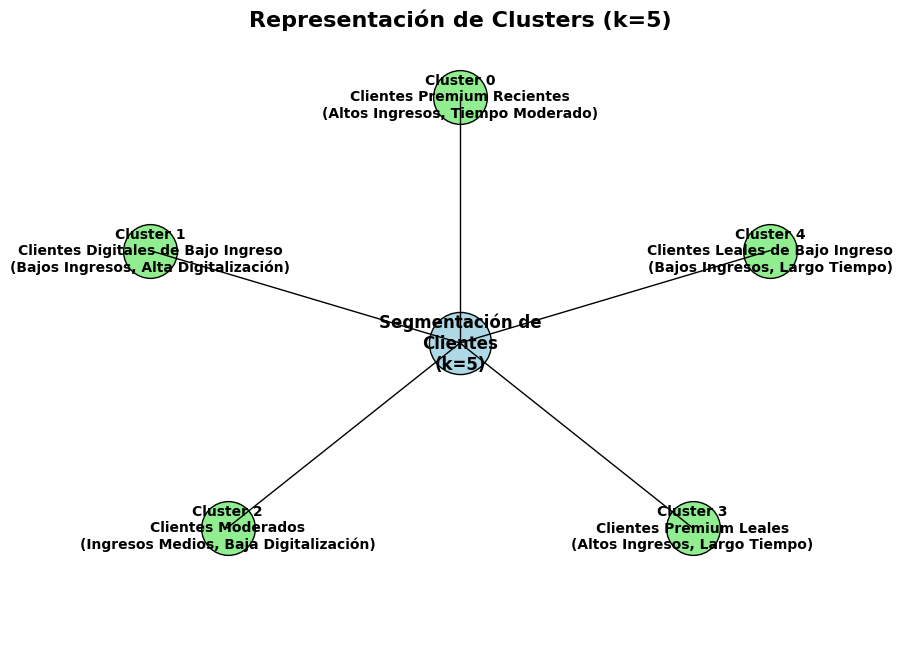

In [13]:
import matplotlib.pyplot as plt

# Crear un esquema conceptual de los clusters en español
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

# Coordenadas y etiquetas para los clusters en español
clusters = {
    "Cluster 0\nClientes Premium Recientes\n(Altos Ingresos, Tiempo Moderado)": (0, 0.8),
    "Cluster 1\nClientes Digitales de Bajo Ingreso\n(Bajos Ingresos, Alta Digitalización)": (-0.8, 0.3),
    "Cluster 2\nClientes Moderados\n(Ingresos Medios, Baja Digitalización)": (-0.6, -0.6),
    "Cluster 3\nClientes Premium Leales\n(Altos Ingresos, Largo Tiempo)": (0.6, -0.6),
    "Cluster 4\nClientes Leales de Bajo Ingreso\n(Bajos Ingresos, Largo Tiempo)": (0.8, 0.3),
}

# Dibujar círculo central
ax.scatter(0, 0, s=2000, c='lightblue', edgecolor='black', label="Segmentación de Clientes (k=5)")
ax.text(0, 0, "Segmentación de\nClientes\n(k=5)", ha='center', va='center', fontsize=12, weight='bold')

# Dibujar clusters
for label, (x, y) in clusters.items():
    ax.scatter(x, y, s=1500, c='lightgreen', edgecolor='black')
    ax.text(x, y, label, ha='center', va='center', fontsize=10, weight='bold')

# Dibujar líneas conectando clusters al círculo central
for _, (x, y) in clusters.items():
    ax.plot([0, x], [0, y], 'k-', lw=1)

# Eliminar ejes para un diseño limpio
ax.axis('off')

# Título
plt.title("Representación de Clusters (k=5)", fontsize=16, weight='bold')
plt.show()


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^

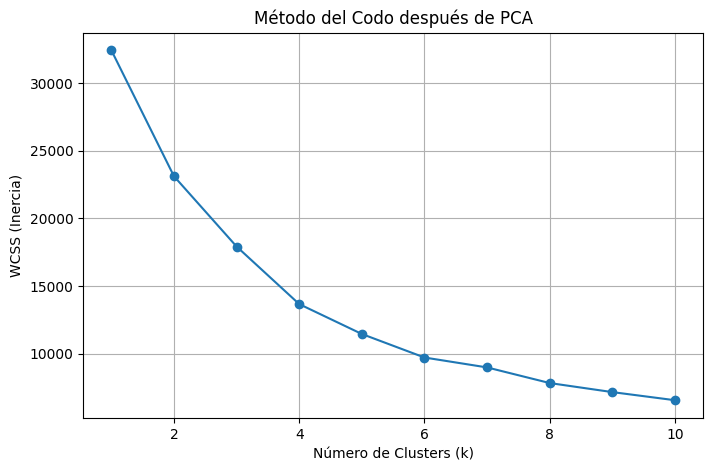

Resultados guardados en 'Client_segment_with_PCA_clusters.csv'


In [1]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Cargar los datos
file_path = "Client_segment_MODIFICADO_updated.csv"
data = pd.read_csv(file_path)

# Seleccionar las variables relevantes
selected_features = ['Dias_cliente', 'Ingresos anuales brutos', 'Digital_encuesta']
X = data[selected_features]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=0.95)  # Mantener el 95% de la varianza
X_pca = pca.fit_transform(X_scaled)

# Determinar el número óptimo de clusters (método del codo)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo después de PCA')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS (Inercia)')
plt.grid()
plt.show()

# Entrenar K-Means con el número óptimo de clusters (por ejemplo, k=5)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Agregar los clusters al dataset original
data['Cluster'] = clusters

# Guardar los resultados
data.to_csv("Client_segment_with_PCA_clusters.csv", index=False)
print("Resultados guardados en 'Client_segment_with_PCA_clusters.csv'")


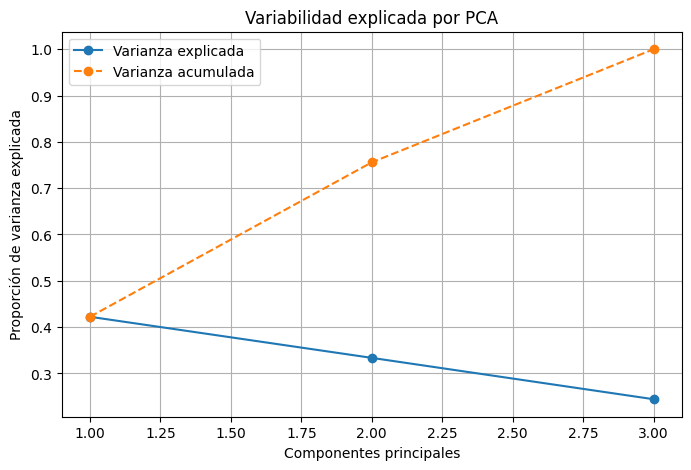

In [2]:
# Visualizar la variabilidad explicada
explained_variance = pca.explained_variance_ratio_

# Graficar la varianza explicada por cada componente
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label='Varianza explicada')
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--', label='Varianza acumulada')
plt.title('Variabilidad explicada por PCA')
plt.xlabel('Componentes principales')
plt.ylabel('Proporción de varianza explicada')
plt.legend()
plt.grid()
plt.show()


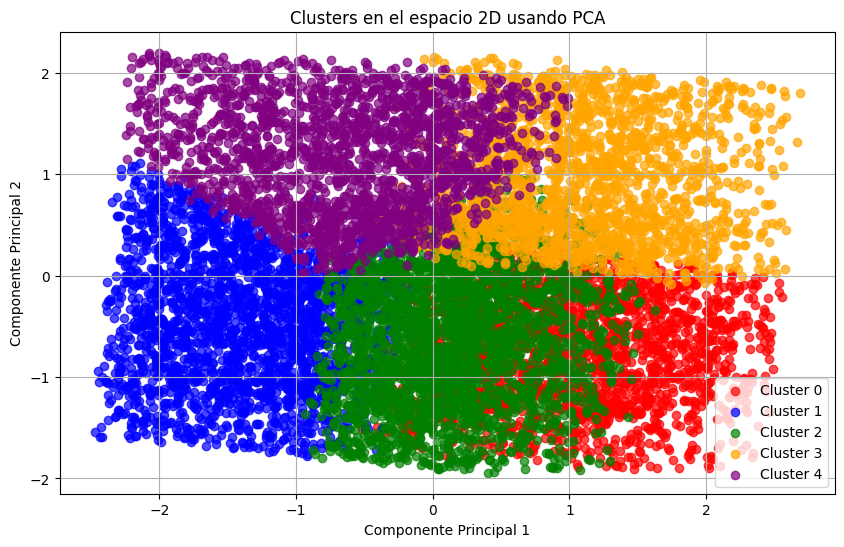

In [3]:
import matplotlib.pyplot as plt

# Graficar los clusters en el espacio 2D de las dos primeras componentes principales (PCA)
plt.figure(figsize=(10, 6))

# Asignar colores a los clusters
colors = ['red', 'blue', 'green', 'orange', 'purple']

for cluster in range(5):
    cluster_data = X_pca[clusters == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}', alpha=0.7, color=colors[cluster])

plt.title('Clusters en el espacio 2D usando PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid()
plt.show()


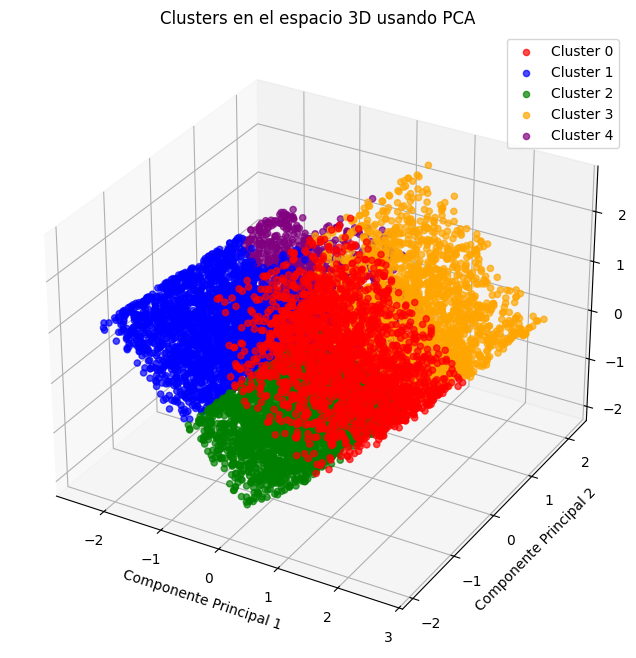

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Graficar los clusters en el espacio 3D usando las tres primeras componentes principales
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Asignar colores a los clusters
colors = ['red', 'blue', 'green', 'orange', 'purple']

for cluster in range(5):
    cluster_data = X_pca[clusters == cluster]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], 
               label=f'Cluster {cluster}', alpha=0.7, color=colors[cluster])

ax.set_title('Clusters en el espacio 3D usando PCA')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.legend()
plt.show()


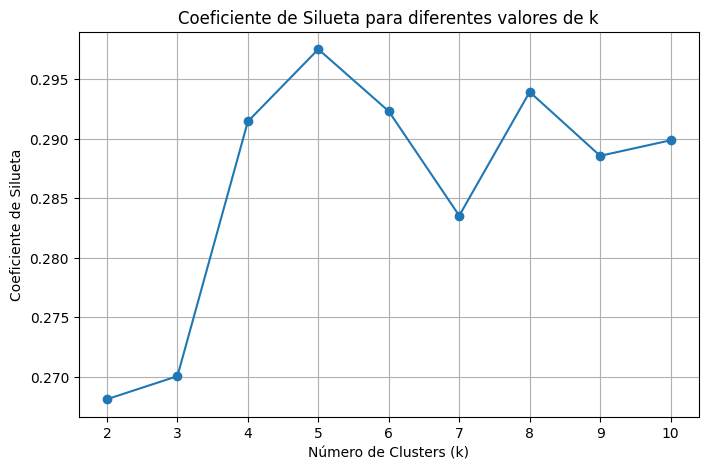

In [5]:
from sklearn.metrics import silhouette_score

# Probar diferentes valores de k
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_scores.append(score)

# Graficar el coeficiente de silueta para diferentes valores de k
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Coeficiente de Silueta para diferentes valores de k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silueta')
plt.grid()
plt.show()


In [8]:
# Resumen de características promedio por cluster con k=5
cluster_summary_k5 = data.groupby('Cluster').mean()

# Mostrar el resumen directamente
print("Resumen de características promedio por cluster con k=5:")
print(cluster_summary_k5)

# Exportar los resultados a un archivo CSV
data.to_csv("Client_segment_with_clusters_k5.csv", index=False)
print("Resultados guardados en 'Client_segment_with_clusters_k5.csv'")


Resumen de características promedio por cluster con k=5:
               ID    Genero    Casado      Edad  Graduado  Profesion  \
Cluster                                                                
0        0.503208  0.543972  0.796443  0.495192  0.742589   0.400692   
1        0.503495  0.540754  0.349693  0.198072  0.436021   0.421724   
2        0.496630  0.551253  0.596052  0.369804  0.666667   0.404755   
3        0.503083  0.555617  0.804783  0.486288  0.748610   0.383899   
4        0.494616  0.540619  0.473888  0.273391  0.551257   0.413201   

         Experiencia laboral  Gastoscore  Family_Size  Generacion  \
Cluster                                                             
0                   0.039526    0.555830     0.183918    0.394763   
1                   0.642419    0.529798     0.262270    0.764388   
2                   0.282840    0.548026     0.222618    0.611997   
3                   0.046997    0.561457     0.182147    0.408602   
4                   0.47

Cluster 0 (Clientes Premium Recientes):

Características destacadas:
Altos ingresos (75.3%).
Bajo tiempo como cliente (27.9%).
Gasto mensual alto (21.9%).
Estrategia sugerida:
Ofrecer programas de fidelización para retener a estos clientes de alto valor.
Cluster 1 (Clientes Digitales de Bajo Ingreso):

Características destacadas:
Bajos ingresos (14.3%).
Alta digitalización (73.1%).
Gasto mensual muy bajo (1.4%).
Estrategia sugerida:
Fomentar su gasto ofreciendo servicios digitales económicos y atractivos.
Cluster 2 (Clientes Moderados):

Características destacadas:
Ingresos moderados (21.5%).
Baja digitalización (21.1%).
Moderado tiempo como cliente (33.5%).
Estrategia sugerida:
Incentivar el uso de servicios digitales para maximizar su participación.
Cluster 3 (Clientes Premium Leales):

Características destacadas:
Altos ingresos (71.3%).
Largo tiempo como cliente (72.8%).
Gasto mensual alto (20.3%).
Estrategia sugerida:
Mantener su satisfacción con beneficios exclusivos, como programas VIP.
Cluster 4 (Clientes Leales de Bajo Ingreso):

Características destacadas:
Bajos ingresos (16.7%).
Largo tiempo como cliente (77.1%).
Baja tasa de abandono (10.6%).
Estrategia sugerida:
Recompensar su lealtad con paquetes accesibles y promociones.


Distribución de clientes por cluster:
Cluster
2    2634
1    2282
4    2068
0    2024
3    1798
Name: count, dtype: int64


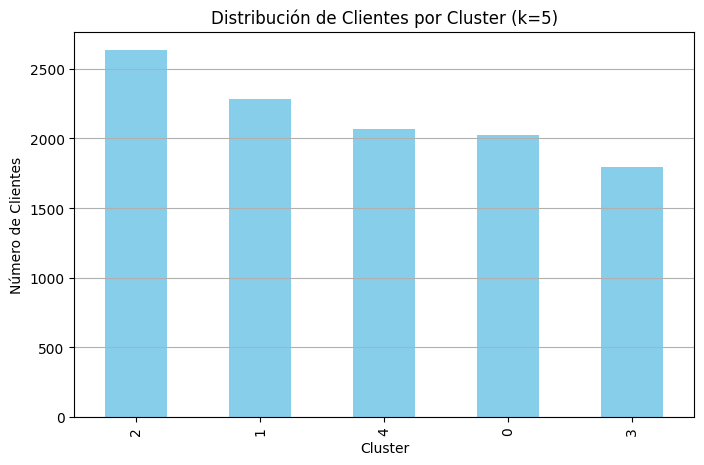

In [9]:
# Verificar la distribución de clientes por cluster
cluster_distribution = data['Cluster'].value_counts()

# Mostrar la distribución
print("Distribución de clientes por cluster:")
print(cluster_distribution)

# Graficar la distribución
cluster_distribution.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title("Distribución de Clientes por Cluster (k=5)")
plt.xlabel("Cluster")
plt.ylabel("Número de Clientes")
plt.grid(axis='y')
plt.show()


In [10]:
# Verificar si las características promedio difieren significativamente entre clusters
cluster_summary_k5 = data.groupby('Cluster').mean()
print("Características promedio por cluster:")
print(cluster_summary_k5)


Características promedio por cluster:
               ID    Genero    Casado      Edad  Graduado  Profesion  \
Cluster                                                                
0        0.503208  0.543972  0.796443  0.495192  0.742589   0.400692   
1        0.503495  0.540754  0.349693  0.198072  0.436021   0.421724   
2        0.496630  0.551253  0.596052  0.369804  0.666667   0.404755   
3        0.503083  0.555617  0.804783  0.486288  0.748610   0.383899   
4        0.494616  0.540619  0.473888  0.273391  0.551257   0.413201   

         Experiencia laboral  Gastoscore  Family_Size  Generacion  \
Cluster                                                             
0                   0.039526    0.555830     0.183918    0.394763   
1                   0.642419    0.529798     0.262270    0.764388   
2                   0.282840    0.548026     0.222618    0.611997   
3                   0.046997    0.561457     0.182147    0.408602   
4                   0.478240    0.542070   

Cluster 1: Digitales de Bajo Ingreso
Características principales:
Bajos ingresos anuales brutos (14.3%).
Alta digitalización (73.1%).
Gasto mensual muy bajo (1.4%).
Más experiencia laboral (64.2%).
Interpretación:
Clientes digitalmente activos pero con ingresos limitados y poco gasto.
Estrategia:
Promocionar servicios digitales accesibles y económicos.
Diseñar ofertas exclusivas para fomentar el gasto.
Cluster 2: Clientes Moderados
Características principales:
Ingresos anuales moderados (21.4%).
Baja digitalización (21.1%).
Moderado tiempo como cliente (33.5%).
Proporción equilibrada de graduados (66.7%).
Interpretación:
Este grupo representa clientes promedio en cuanto a ingresos y tiempo como cliente, pero con baja interacción digital.
Estrategia:
Incentivar el uso de servicios digitales con campañas educativas o descuentos.
Fortalecer su compromiso con programas de fidelización.
Cluster 3: Premium Leales
Características principales:
Altos ingresos anuales brutos (71.3%).
Largo tiempo como cliente (72.8%).
Gasto mensual alto (20.3%).
Alta proporción de graduados (74.9%).
Interpretación:
Clientes de alto valor que llevan mucho tiempo en la empresa.
Estrategia:
Mantener su satisfacción con beneficios VIP.
Ofrecer servicios exclusivos y asegurar soporte preferencial.
Cluster 4: Leales de Bajo Ingreso
Características principales:
Bajos ingresos anuales brutos (16.7%).
Largo tiempo como cliente (77.1%).
Baja tasa de abandono (10.6%).
Digitalización moderada (50.7%).
Interpretación:
Clientes leales y con baja probabilidad de abandono, pero con ingresos limitados.
Estrategia:
Ofrecer paquetes económicos y mantener su lealtad con promociones personalizadas.
Conclusión general:
Diferencias claras entre clusters:
Los clusters tienen características distintas, lo que valida la segmentación.
Estrategias diferenciadas:
Cada cluster puede recibir un enfoque único basado en sus características.